# Emotion Detection Project
## Importing All Libraries required


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer



About Dataset
Emotions Detection Dataset
This dataset is a comprehensive collection of text samples labeled with emotions. It is designed for training and testing emotion detection models using Natural Language Processing (NLP) techniques.
A freely available dataset for emotion detection from text, designed to support researchers, developers, and enthusiasts in building and improving emotion analysis models.

Dataset Details
Data Type: Text
File Format: CSV
Emotion Categories:
😊 Joy
😢 Sadness
😨 Fear
😡 Anger
😲 Surprise
Key Features
Pre-labeled text samples for supervised learning tasks.
Easy to integrate into machine learning pipelines.
Open for all to use and modify.
Usage
This dataset is ideal for researchers and developers working on emotion detection, sentiment analysis, or other NLP tasks.

## Data loading

In [3]:
data=pd.read_csv("emotion_dataset.csv")
data

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


## Exploratory Data Analysis(EDA)
The data shape is (34791,2)

The data has missing values in clean_text column but i think that i will not remove them as we will train our model only on text not on clean_text column as both are almost same, so that our model not get confused.

Most of the emotions are of joy and least are of shame


In [4]:
data.shape
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34792 non-null  int64 
 1   Emotion     34792 non-null  object
 2   Text        34792 non-null  object
 3   Clean_Text  34326 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [5]:
# Missing value
data.isnull().sum().sort_index(ascending=True)

Clean_Text    466
Emotion         0
Text            0
Unnamed: 0      0
dtype: int64

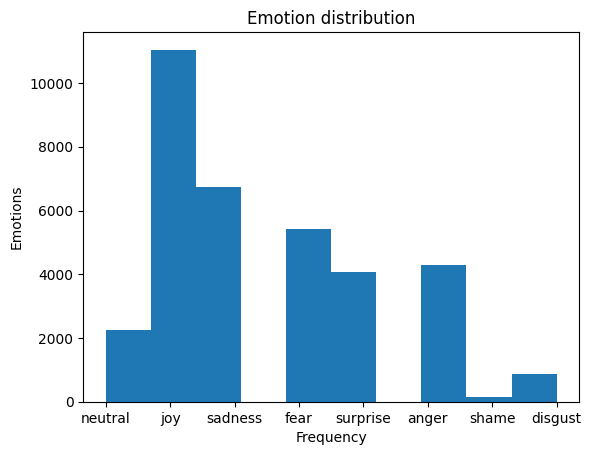

In [6]:
# visulizing the data
plt.hist(data["Emotion"], bins=10,histtype="bar")
plt.title("Emotion distribution")
plt.xlabel("Frequency")
plt.ylabel("Emotions")
plt.show()

## Data Splitting 

In [7]:
data.columns

Index(['Unnamed: 0', 'Emotion', 'Text', 'Clean_Text'], dtype='object')

In [8]:
# As we donot want id and clean_text columns so we will remove them from data
data=data[["Emotion","Text"]]
data.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [9]:
# Creating X and y 
X=data["Text"]
y=data["Emotion"]
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 34792 entries, 0 to 34791
Series name: Text
Non-Null Count  Dtype 
--------------  ----- 
34792 non-null  object
dtypes: object(1)
memory usage: 271.9+ KB


## NLP AND DL

In [13]:

import re
ps=PorterStemmer()
corpus=[]

for i in range(0,len(X)):
    review=re.sub("[^a-zA-Z]"," ",X[i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words("English")]
    review=" ".join(review)
    corpus.append(review)

In [ ]:
# One hot representation of the X of model training
voc_size=40000
one_hot_repr=one_hot()